#Import

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from matplotlib import pyplot
import glob

# Functions

In [ ]:
def resize_image(img_array, scale_factor):
    # Calculate the new size after scaling
    new_size = tuple(int(dim * scale_factor) for dim in img_array.shape[::-1])

    # Use OpenCV to resize the image
    resized_image = cv2.resize(img_array, new_size, interpolation=cv2.INTER_LINEAR)

    return resized_image

In [ ]:
def view_pgn_file(file_path):
    try:
        img = Image.open(file_path)
        display(img)
    except Exception as e:
        print(f"Error: {e}")

In [ ]:
def get_pgn_data(file_path):
    try:
        img = Image.open(file_path)
        img_array = np.array(img)
        # Perform further operations on the 'img_array' here
    except Exception as e:
        print(f"Error: {e}")

    return img_array

In [ ]:
def show16ImagesGrid(pathDiaplay):
  image_files = os.listdir(pathDiaplay )
  selected_files = np.random.choice(image_files, size=16, replace=False)
  window_size = (19*2, 19*2)

  fig, ax = plt.subplots(4, 4, figsize=(4, 4))

  for i, file_name in enumerate(selected_files):
      file_path = os.path.join(pathDiaplay, file_name)
      img = get_pgn_data(file_path)

      # Resize the image to the desired window size
      img = cv2.resize(img, window_size, interpolation=cv2.INTER_AREA)

      # Plot the image
      row_idx, col_idx = i // 4, i % 4
      ax[row_idx, col_idx].imshow(img, cmap='gray')
      ax[row_idx, col_idx].axis('off')

In [ ]:
def count_png_images(folder_path):
    # Use glob to find all PGM files in the folder
    png_files = glob.glob(os.path.join(folder_path, '*.png'))

    # Get the count of PGM images
    png_count = len(png_files)

    return png_count

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


## View Some Files

In [ ]:
train_path = '/content/gdrive/MyDrive/Imagespng/train'
face_train_path = os.path.join(train_path,'face')
nonface_train_path = os.path.join(train_path,'non-face')

In [ ]:
view_pgn_file(os.path.join(face_train_path,'face00001.png'))

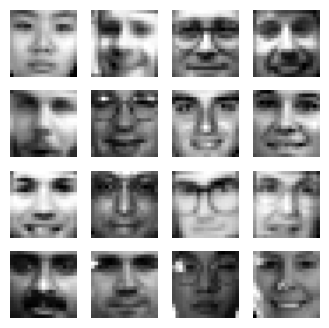

In [ ]:
show16ImagesGrid(face_train_path)

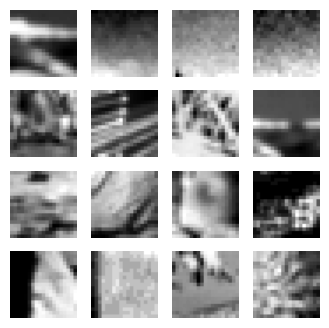

In [ ]:
show16ImagesGrid(nonface_train_path)

# CNN Generator for folder

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the image dimensions and batch size
image_width, image_height = 19, 19
batch_size = 32

In [ ]:
negative_folder = nonface_train_path
positive_folder = face_train_path

**(batch size, height, width, channels)**

In [ ]:
img = get_pgn_data(os.path.join(face_train_path,'face00001.png'))
print(img.shape)
print(img.min(),img.max())
image_batch = np.expand_dims(img, axis=(0, -1))
print(image_batch.shape)

(19, 19)
54 189
(1, 19, 19, 1)


### augmentation

In [ ]:
# Data augmentation to increase the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.9,1.1],
    horizontal_flip=True,
    brightness_range=(0.9, 1.1))

In [ ]:
def view_aug(img,train_datagen=train_datagen):
    # Create a 4x4 grid for displaying the augmented images
    fig, ax = plt.subplots(4, 4, figsize=(6, 6))

    # Create a dummy batch of size 1 containing your 19x19 image
    # Assuming 'image' is your 19x19 numpy array
    image_batch = np.expand_dims(img, axis=(0, -1))



    # Generate and display augmented images
    # Start index for grid plotting
    grid_row, grid_col = 0, 0

    for batch in train_datagen.flow(image_batch, batch_size=1):
        # Extract the augmented image from the batch
        augmented_image = batch[0]

        # Plot the augmented image
        ax[grid_row, grid_col].imshow(augmented_image, cmap='gray')
        ax[grid_row, grid_col].axis('off')

        # Update grid index
        grid_col += 1
        if grid_col == 4:
            grid_row += 1
            grid_col = 0

        # Stop after 16 augmentations (4x4 grid)
        if grid_row == 4:
            break

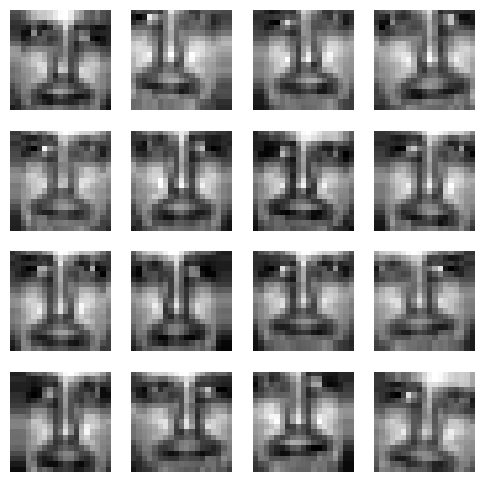

In [ ]:
view_aug(img)

In [ ]:
train_path

'/content/gdrive/MyDrive/Imagespng/train'

In [ ]:
# preprocessing
# Load and augment the negative images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',  # if need set rgb
    classes=['non-face', 'face']  # Specify folder names for classes
)

Found 6977 images belonging to 2 classes.


### view some batch

In [ ]:
# Generate and display a batch of augmented images for testing
augmented_images, labels = train_generator.next()
print(augmented_images.shape)
print(labels.shape)

(32, 19, 19, 1)
(32,)


In [ ]:
def plot_augmented_images_8_4(images, labels):
    num_images = len(images)

    if num_images < 8:
        raise ValueError("Number of images should be at least 8 for a 8x4 grid.")

    fig, ax = plt.subplots(8, 4, figsize=(6, 10))

    for i in range(8):
        for j in range(4):
            idx = i * 4 + j
            if idx >= num_images:
                break

            ax[i, j].imshow(images[idx].reshape((19, 19)), cmap='gray')
            ax[i, j].set_title("Label: {}".format(labels[idx]))
            ax[i, j].axis('off')

    plt.tight_layout()
    plt.show()



# This function will plot the images and their corresponding labels in a grid layout of 8 rows and 4 columns.
#If you have more than 32 images, it will plot the first 32 images. Make sure you have at least 32 images in your
# augmented_images and labels arrays to create the grid.


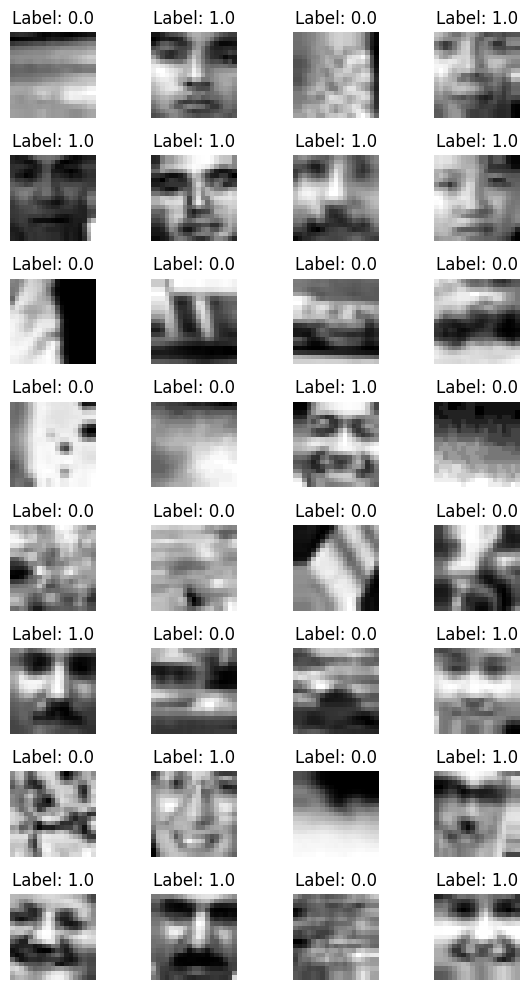

In [ ]:
# Example usage:
# Assuming you have augmented_images (32, 19, 19, 1) and labels (32,) numpy arrays
plot_augmented_images_8_4(augmented_images, labels)

### set weights

In [ ]:
# Calculate class weights to handle class imbalance
total_negative_images = count_png_images(negative_folder)
total_positive_images = count_png_images(positive_folder)
total_images = total_negative_images + total_positive_images
class_weight = {0: total_images / (2 * total_negative_images), 1: total_images / (2 * total_positive_images)}


print('total_negative_images',total_negative_images)
print('total_positive_images',total_positive_images)
print('total_imagess',total_images)
print('class_weight',class_weight)


total_negative_images 4548
total_positive_images 2429
total_imagess 6977
class_weight {0: 0.7670404573438874, 1: 1.4361877315767806}


### Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

In [ ]:
# Add the remaining layers as needed for your task
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 17, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
'''
# Train the model just check
epochs=3 # just see it works
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=(total_negative_images + total_positive_images) // batch_size,
    epochs=epochs,
    class_weight=class_weight)

'''

'\n# Train the model just check\nepochs=3 # just see it works\nmodel.fit_generator(\n    generator=train_generator,\n    steps_per_epoch=(total_negative_images + total_positive_images) // batch_size,\n    epochs=epochs,\n    class_weight=class_weight)\n\n'

# use Validation

In [ ]:
batch_size=64

In [ ]:
train_datagen = ImageDataGenerator( rescale=1.0 / 255,
                                    rotation_range=5,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=[0.9,1.1],
                                    horizontal_flip=True,
                                    brightness_range=(0.9, 1.1),
                                    validation_split=0.2)  # val 20%


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
'''
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',  # if need set rgb
    classes=['non-face', 'face']  # Specify folder names for classes
)
'''

"\ntrain_generator = train_datagen.flow_from_directory(\n    train_path,\n    target_size=(image_width, image_height),\n    batch_size=batch_size,\n    class_mode='binary',\n    color_mode='grayscale',  # if need set rgb\n    classes=['non-face', 'face']  # Specify folder names for classes\n)\n"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                               target_size=(image_width, image_height),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=True,
                                               classes=['non-face', 'face'],
                                               subset = 'training')

Found 5583 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(train_path,
                                           target_size=(image_width, image_height),
                                           color_mode='grayscale',
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           shuffle=False,
                                           classes=['non-face', 'face'],
                                           subset = 'validation')

Found 1394 images belonging to 2 classes.


In [ ]:
def getSimpleModel():

  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Conv2D(128, (3, 3), activation='relu'))
  #model.add(Conv2D(128, (3, 3), activation='relu'))


  # Add the remaining layers as needed for your task
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = getSimpleModel()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
total_train_samples = train_generator.n #5583
total_val_samples =  validation_generator.n #1394

print("train validation", total_train_samples ,total_val_samples)

train validation 5583 1394


In [ ]:
# Get the class indices from the train_generator
class_indices = train_generator.classes

# Count the occurrences of each class index
num_positives = np.sum(class_indices == train_generator.class_indices['face'])
num_negatives = np.sum(class_indices == train_generator.class_indices['non-face'])

print("Number of positive samples:", num_positives)
print("Number of negative samples:", num_negatives)
print("Ratio", num_negatives/num_positives)

Number of positive samples: 1944
Number of negative samples: 3639
Ratio 1.8719135802469136


In [ ]:
# Get the class indices from the validation_generator
class_indices = validation_generator.classes

# Count the occurrences of each class index
num_positives = np.sum(class_indices == validation_generator.class_indices['face'])
num_negatives = np.sum(class_indices == validation_generator.class_indices['non-face'])

print("Number of positive samples:", num_positives)
print("Number of negative samples:", num_negatives)
print("Ratio", num_negatives/num_positives)

Number of positive samples: 485
Number of negative samples: 909
Ratio 1.8742268041237113


In [ ]:
class_weight

{0: 0.7670404573438874, 1: 1.4361877315767806}

In [ ]:
1.4/0.76

1.8421052631578947

In [ ]:
epochs=15 # just see it works
history = model.fit_generator(
    generator=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=total_train_samples // batch_size,
    validation_steps  = total_val_samples // batch_size,
    epochs=epochs,
    class_weight=class_weight)

<ipython-input-44-806381fbf6c9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
87/87 [==============================] - 80s 142ms/step - loss: 0.4544 - accuracy: 0.7751 - val_loss: 1.0005 - val_accuracy: 0.6109
Epoch 2/15
87/87 [==============================] - 13s 151ms/step - loss: 0.2678 - accuracy: 0.8951 - val_loss: 0.8378 - val_accuracy: 0.6868
Epoch 3/15
87/87 [==============================] - 12s 143ms/step - loss: 0.2217 - accuracy: 0.9165 - val_loss: 0.6771 - val_accuracy: 0.7448
Epoch 4/15
87/87 [==============================] - 12s 142ms/step - loss: 0.1800 - accuracy: 0.9333 - val_loss: 0.6514 - val_accuracy: 0.7530
Epoch 5/15
87/87 [==============================] - 12s 142ms/step - loss: 0.1511 - accuracy: 0.9469 - val_loss: 0.6244 - val_accuracy: 0.7552
Epoch 6/15
87/87 [==============================] - 13s 152ms/step - loss: 0.1184 - accuracy: 0.9554 - val_loss: 0.2932 - val_accuracy: 0.8750
Epoch 7/15
87/87 [==============================] - 12s 142ms/step - loss: 0.0893 - accuracy: 0.9701 - val_loss: 0.4709 - val_accuracy: 0.8147

In [ ]:
model.save('/content/gdrive/MyDrive/Imagespng/')

In [ ]:
def plot_history(history):

  # Plot the training and validation loss
  plt.figure()
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.grid(True)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


  # Plot the training and validation accuracy
  plt.figure()
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.grid(True)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()


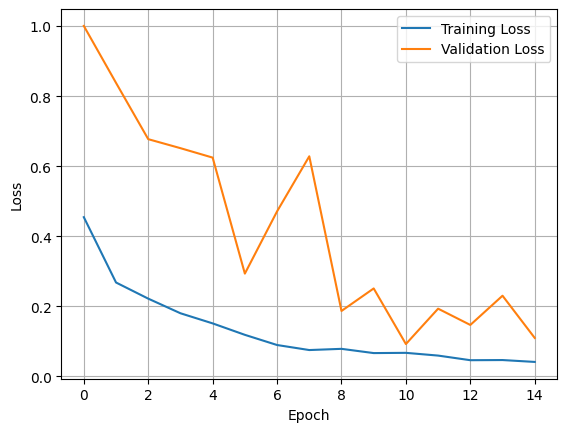

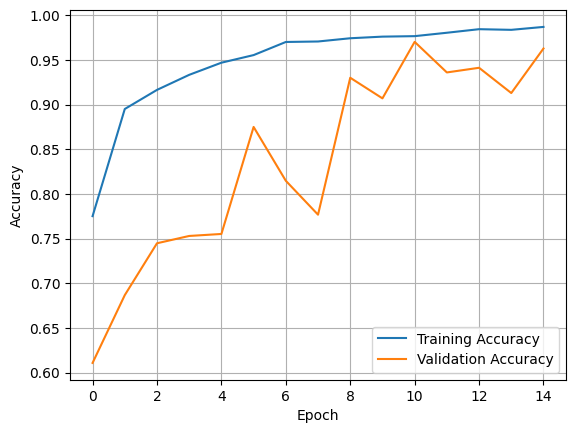

In [ ]:
plot_history(history)

In [ ]:
from keras import metrics

## Evaluate on the training and validation datasets:

In [ ]:
# Evaluate on the training dataset
train_scores = model.evaluate_generator(train_generator)
print("Training Loss:", train_scores[0])
print("Training Accuracy:", train_scores[1])

# Evaluate on the validation dataset
valid_scores = model.evaluate_generator(validation_generator)
print("Validation Loss:", valid_scores[0])
print("Validation Accuracy:", valid_scores[1])


<ipython-input-49-6cc7f1870d8f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_scores = model.evaluate_generator(train_generator)


Training Loss: 0.03801557049155235
Training Accuracy: 0.9878201484680176


<ipython-input-49-6cc7f1870d8f>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_scores = model.evaluate_generator(validation_generator)


Validation Loss: 0.10563705861568451
Validation Accuracy: 0.9641320109367371


**Calculate precision, recall, and confusion matrix:**

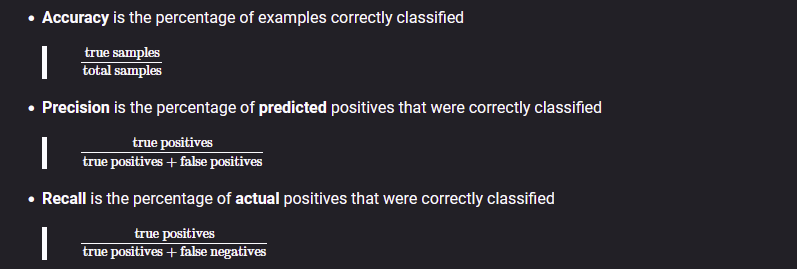

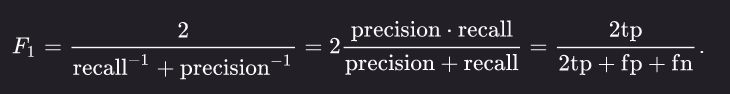

#reset genertor

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                               target_size=(image_width, image_height),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False,
                                               classes=['non-face', 'face'],
                                               subset = 'training')

validation_generator = val_datagen.flow_from_directory(train_path,
                                           target_size=(image_width, image_height),
                                           color_mode='grayscale',
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           shuffle=False,
                                           classes=['non-face', 'face'],
                                           subset = 'validation')

Found 5583 images belonging to 2 classes.
Found 1394 images belonging to 2 classes.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for the training and validation datasets
train_predictions = model.predict_generator(train_generator).flatten()
valid_predictions = model.predict_generator(validation_generator).flatten()

# Convert probabilities to binary predictions (0 or 1)
train_predictions_binary = (train_predictions > 0.5).astype(int)
valid_predictions_binary = (valid_predictions > 0.5).astype(int)

# Calculate precision, recall, and confusion matrix for training data
train_precision_recall = classification_report(train_generator.classes, train_predictions_binary)
train_confusion_matrix = confusion_matrix(train_generator.classes, train_predictions_binary)
print("Training Precision & Recall:\n", train_precision_recall)
print("Training Confusion Matrix:\n", train_confusion_matrix)

# Calculate precision, recall, and confusion matrix for validation data
valid_precision_recall = classification_report(validation_generator.classes, valid_predictions_binary)
valid_confusion_matrix = confusion_matrix(validation_generator.classes, valid_predictions_binary)
print("Validation Precision & Recall:\n", valid_precision_recall)
print("Validation Confusion Matrix:\n", valid_confusion_matrix)


<ipython-input-51-ea2cae34b76d>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  train_predictions = model.predict_generator(train_generator).flatten()
<ipython-input-51-ea2cae34b76d>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  valid_predictions = model.predict_generator(validation_generator).flatten()


Training Precision & Recall:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3639
           1       0.98      0.99      0.98      1944

    accuracy                           0.99      5583
   macro avg       0.99      0.99      0.99      5583
weighted avg       0.99      0.99      0.99      5583

Training Confusion Matrix:
 [[3603   36]
 [  28 1916]]
Validation Precision & Recall:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       909
           1       0.91      0.99      0.95       485

    accuracy                           0.96      1394
   macro avg       0.95      0.97      0.96      1394
weighted avg       0.97      0.96      0.96      1394

Validation Confusion Matrix:
 [[864  45]
 [  5 480]]


In [ ]:
train_predictions[:10]>0.5

array([False, False, False, False, False, False,  True, False, False,
       False])

In [ ]:
train_generator.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

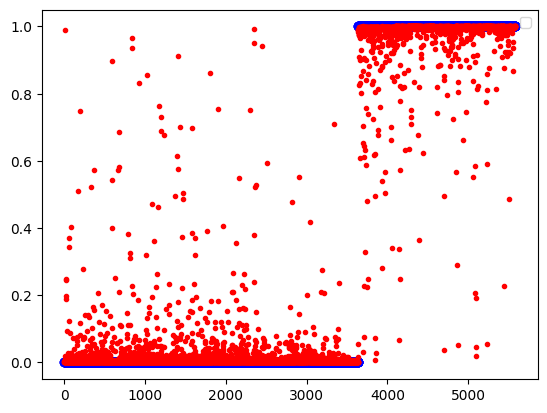

In [ ]:
plt.figure()
plt.plot(train_generator.classes,'bo')
plt.plot(train_predictions,'r.')
plt.legend()


Calculate ROC and **AUC**

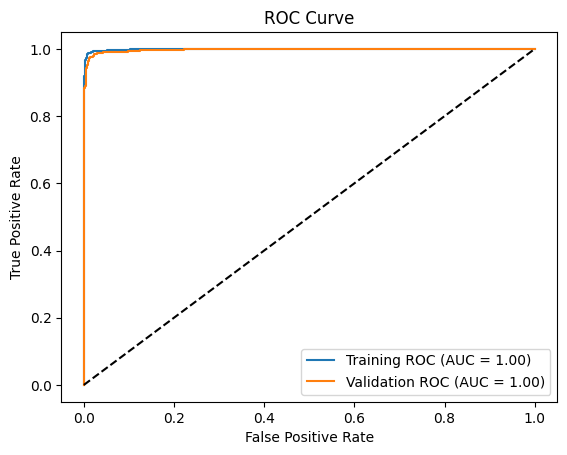

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for training data
train_roc_auc = roc_auc_score(train_generator.classes, train_predictions)
fpr_train, tpr_train, _ = roc_curve(train_generator.classes, train_predictions)
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {train_roc_auc:.2f})')

# Calculate ROC curve and AUC for validation data
valid_roc_auc = roc_auc_score(validation_generator.classes, valid_predictions)
fpr_valid, tpr_valid, _ = roc_curve(validation_generator.classes, valid_predictions)
plt.plot(fpr_valid, tpr_valid, label=f'Validation ROC (AUC = {valid_roc_auc:.2f})')

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')



## test evaluate

In [ ]:
test_folder='/content/gdrive/MyDrive/Imagespng/test'

In [ ]:
print('test faces: ',count_png_images(os.path.join(test_folder,'face')))

test faces:  472


In [ ]:
print('test faces: ',count_png_images(os.path.join(test_folder,'non-face')))

test faces:  23573


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
    # Add other preprocessing settings for test data if needed
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary',  # Use 'binary' for binary classification
    color_mode='grayscale',  # For grayscale images
    shuffle=False,
    classes=['non-face', 'face']
)


Found 24045 images belonging to 2 classes.


In [ ]:
test_generator.n

24045

In [ ]:
# Get the class indices from the train_generator
class_indices = test_generator.classes

# Count the occurrences of each class index
num_positives = np.sum(class_indices == test_generator.class_indices['face'])
num_negatives = np.sum(class_indices == test_generator.class_indices['non-face'])

print("Number of positive samples:", num_positives)
print("Number of negative samples:", num_negatives)
print("Ratio", num_negatives/num_positives)

Number of positive samples: 472
Number of negative samples: 23573
Ratio 49.942796610169495


## plot confusion matrix

In [ ]:
np.unique(train_generator.classes)

NameError: ignored

In [ ]:
# Evaluate on the test dataset
test_scores = model.evaluate_generator(test_generator)
print("Test Loss:", test_scores[0])
print("Test Accuracy:", test_scores[1])


<ipython-input-90-b42570f19582>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_scores = model.evaluate_generator(test_generator)


In [ ]:
test_predictions = model.predict_generator(test_generator).flatten()
test_predictions_binary = (test_predictions > 0.5).astype(int)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Create confusion matrices
train_cm = confusion_matrix(train_generator.classes, train_predictions_binary)
valid_cm = confusion_matrix(validation_generator.classes, valid_predictions_binary)


# Define class labels (e.g., 'faces' and 'no faces')
class_labels = train_generator.class_indices.keys()

In [ ]:
test_cm = confusion_matrix(test_generator.classes, test_predictions_binary)
test_cm

In [ ]:
# Plot the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 4))


#   plt.imshow(np.log(cm+ 1e-5), interpolation='nearest', cmap=plt.cm.Blues)

# Train confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Validation confusion matrix
plt.subplot(1, 3, 2)
sns.heatmap(valid_cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


# Test confusion matrix
plt.subplot(1, 3, 3)


sns.heatmap(test_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.tight_layout()

In [ ]:
# Calculate percentages and normalize the confusion matrix
train_cm_percent = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis] * 100
print(train_cm_percent)

In [ ]:
# Calculate percentages and normalize the confusion matrix
valid_cm_percent = valid_cm.astype('float') / valid_cm.sum(axis=1)[:, np.newaxis] * 100

In [ ]:
# Calculate percentages and normalize the confusion matrix
test_cm_percent = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis] * 100
test_cm_percent

In [ ]:
# Plot the confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 4))

# Train confusion matrix
plt.subplot(1, 3, 1)
sns.heatmap(train_cm_percent, annot=True, fmt='1.1f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Validation confusion matrix
plt.subplot(1, 3, 2)
sns.heatmap(valid_cm_percent, annot=True, fmt='1.1f', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


# Test confusion matrix
plt.subplot(1, 3, 3)


sns.heatmap(test_cm_percent, annot=True, fmt='1.1f', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.tight_layout()

In [ ]:
# Calculate precision, recall, and confusion matrix for test data
test_precision_recall = classification_report(test_generator.classes, test_predictions_binary)
test_confusion_matrix = confusion_matrix(test_generator.classes, test_predictions_binary)
print("Test Precision & Recall:\n", test_precision_recall)
print("Test Confusion Matrix:\n", test_confusion_matrix)

## imporve by change threshold ?

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate_with_threshold(y_true, y_pred_probs, threshold):
    y_pred_binary = (y_pred_probs > threshold).astype(int)

    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    cm = confusion_matrix(y_true, y_pred_binary)

    return accuracy, precision, recall, f1, cm

In [ ]:
def plot_metrics_vs_threshold(thresholds, accuracies, precisions, recalls, f1_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
    plt.plot(thresholds, precisions, label='Precision', marker='o')
    plt.plot(thresholds, recalls, label='Recall', marker='o')
    plt.plot(thresholds, f1_scores, label='F1-score', marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title('Metrics vs. Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Assuming you have the ground truth labels and the predicted probabilities for the test dataset
thresholds = np.arange(0.1, 1.0, 0.1)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    accuracy, precision, recall, f1, cm = evaluate_with_threshold(validation_generator.classes, valid_predictions, threshold)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Optional: Print metrics and confusion matrix for each threshold
    print(f"Threshold: {threshold:.1f}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

# Plot metrics vs. threshold
plot_metrics_vs_threshold(thresholds, accuracies, precisions, recalls, f1_scores)

In [ ]:
# Assuming you have the ground truth labels and the predicted probabilities for the test dataset
thresholds = np.arange(0.1, 1.0, 0.1)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    accuracy, precision, recall, f1, cm = evaluate_with_threshold(train_generator.classes, train_predictions, threshold)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Optional: Print metrics and confusion matrix for each threshold
    print(f"Threshold: {threshold:.1f}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

# Plot metrics vs. threshold
plot_metrics_vs_threshold(thresholds, accuracies, precisions, recalls, f1_scores)

In [ ]:
# Assuming you have the ground truth labels and the predicted probabilities for the test dataset
thresholds = np.arange(0.1, 1.0, 0.1)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    accuracy, precision, recall, f1, cm = evaluate_with_threshold(test_generator.classes, test_predictions, threshold)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Optional: Print metrics and confusion matrix for each threshold
    print(f"Threshold: {threshold:.1f}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(cm)
    print("-" * 30)

# Plot metrics vs. threshold
plot_metrics_vs_threshold(thresholds, accuracies, precisions, recalls, f1_scores)


In [ ]:
# by evaluating graph selected 0.25 as lowest threshold train,test and validation still ok
selectedThresh=0.25

## statistics after threshold

In [ ]:
def show_confusion(train_cm,valid_cm,test_cm):

  # Plot the confusion matrices using seaborn heatmap
  plt.figure(figsize=(12, 4))


  #   plt.imshow(np.log(cm+ 1e-5), interpolation='nearest', cmap=plt.cm.Blues)

  # Train confusion matrix
  plt.subplot(1, 3, 1)
  sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Train Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  # Validation confusion matrix
  plt.subplot(1, 3, 2)
  sns.heatmap(valid_cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Validation Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')


  # Test confusion matrix
  plt.subplot(1, 3, 3)


  sns.heatmap(test_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Test Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')


  plt.tight_layout()


  # percents
  train_cm_percent = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis] * 100
  valid_cm_percent = valid_cm.astype('float') / valid_cm.sum(axis=1)[:, np.newaxis] * 100
  test_cm_percent = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis] * 100



  plt.figure(figsize=(12, 4))

  # Train confusion matrix
  plt.subplot(1, 3, 1)
  sns.heatmap(train_cm_percent, annot=True, fmt='1.1f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Train Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  # Validation confusion matrix
  plt.subplot(1, 3, 2)
  sns.heatmap(valid_cm_percent, annot=True, fmt='1.1f', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Validation Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')


  # Test confusion matrix
  plt.subplot(1, 3, 3)


  sns.heatmap(test_cm_percent, annot=True, fmt='1.1f', cmap='Oranges', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Test Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')


  plt.tight_layout()

In [ ]:
def showstat(thresh,train_predictions,valid_predictions,test_predictions,train_generator,validation_generator,test_generator):

  # Convert probabilities to binary predictions (0 or 1)
  train_predictions_binary = (train_predictions > thresh).astype(int)
  valid_predictions_binary = (valid_predictions > thresh).astype(int)
  test_predictions_binary  = (test_predictions > thresh).astype(int)

  # Calculate precision, recall, and confusion matrix for training data
  train_precision_recall = classification_report(train_generator.classes, train_predictions_binary)
  train_confusion_matrix = confusion_matrix(train_generator.classes, train_predictions_binary)
  print("Training Precision & Recall:\n", train_precision_recall)
  print("Training Confusion Matrix:\n", train_confusion_matrix)

  # Calculate precision, recall, and confusion matrix for validation data
  valid_precision_recall = classification_report(validation_generator.classes, valid_predictions_binary)
  valid_confusion_matrix = confusion_matrix(validation_generator.classes, valid_predictions_binary)
  print("Validation Precision & Recall:\n", valid_precision_recall)
  print("Validation Confusion Matrix:\n", valid_confusion_matrix)

  # Calculate precision, recall, and confusion matrix for test data
  test_precision_recall = classification_report(test_generator.classes, test_predictions_binary)
  test_confusion_matrix = confusion_matrix(test_generator.classes, test_predictions_binary)
  print("Test Precision & Recall:\n", test_precision_recall)
  print("Test Confusion Matrix:\n", test_confusion_matrix)


  # Create confusion matrices
  train_cm = confusion_matrix(train_generator.classes, train_predictions_binary)
  valid_cm = confusion_matrix(validation_generator.classes, valid_predictions_binary)
  test_cm = confusion_matrix(test_generator.classes, test_predictions_binary)

  show_confusion(train_cm,valid_cm,test_cm)


In [ ]:
  selectedThresh=0.25
  showstat(selectedThresh,train_predictions,valid_predictions,test_predictions,train_generator,validation_generator,test_generator)